In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from  plotly import colors
import pandas as pd


In [2]:
all_edges = pd.read_csv('../03_comparison_experiment/03a_all_edges_all_ffs.csv')
all_edges.head()

,Unnamed: 0,target,edge,ligandA,ligandB,unit,DDG_Exp.,dDDG_Exp.,DDG_OpenFF-1.0,dDDG_OpenFF-1.0,...,error_GAFF2,abserror_GAFF2,error_cGenFF,abserror_cGenFF,error_Consensus_OpenFF_GAFF2_cGenFF,abserror_Consensus_OpenFF_GAFF2_cGenFF,error_Consensus_OpenFF_GAFF2,abserror_Consensus_OpenFF_GAFF2,error_Consensus_all,abserror_Consensus_all
0,jnk1_edge_17124-1_18631-1,jnk1,edge_17124-1_18631-1,17124-1,18631-1,kilocalories / mole,0.26,0.37,1.190000,0.096086,...,1.071262,1.071262,0.516769,0.516769,0.646112,0.646112,0.784876,0.784876,1.222263,1.222263
1,jnk1_edge_17124-1_18634-1,jnk1,edge_17124-1_18634-1,17124-1,18634-1,kilocalories / mole,-0.33,0.29,0.580000,0.128639,...,0.829522,0.829522,0.580956,0.580956,0.852556,0.852556,0.928604,0.928604,0.798413,0.798413
2,jnk1_edge_18626-1_18624-1,jnk1,edge_18626-1_18624-1,18626-1,18624-1,kilocalories / mole,0.38,0.21,0.556667,0.099301,...,0.745717,0.745717,-0.265277,0.265277,0.309516,0.309516,0.616033,0.616033,0.446727,0.446727
3,jnk1_edge_18626-1_18625-1,jnk1,edge_18626-1_18625-1,18626-1,18625-1,kilocalories / mole,0.77,0.21,-0.030000,0.107462,...,-0.062543,0.062543,-0.294379,0.294379,-0.388337,0.388337,-0.155679,0.155679,0.143932,0.143932
4,jnk1_edge_18626-1_18627-1,jnk1,edge_18626-1_18627-1,18626-1,18627-1,kilocalories / mole,0.39,0.22,0.140000,0.046151,...,0.042600,0.042600,-0.232256,0.232256,-0.020344,0.020344,0.064101,0.064101,-0.124060,0.124060


In [3]:
identifiers = [idx[4:] for idx in all_edges.columns if idx.startswith("DDG")]
identifiers

['Exp.',
 'OpenFF-1.0',
 'OpenFF-1.0_converged',
 'OpenFF-1.2',
 'OpenFF-1.2_converged',
 'OpenFF-2.0',
 'OpenFF-2.0_converged',
 'OPLS3e',
 'GAFF2',
 'cGenFF',
 'Consensus_OpenFF_GAFF2_cGenFF',
 'Consensus_OpenFF_GAFF2',
 'Consensus_all']

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 310x300 with 0 Axes>

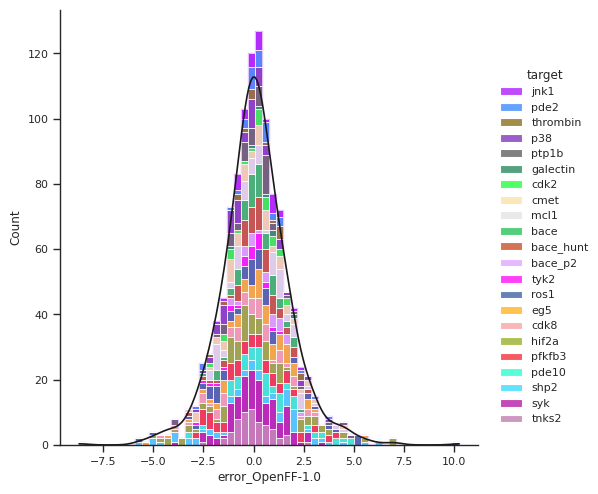

<Figure size 310x300 with 0 Axes>

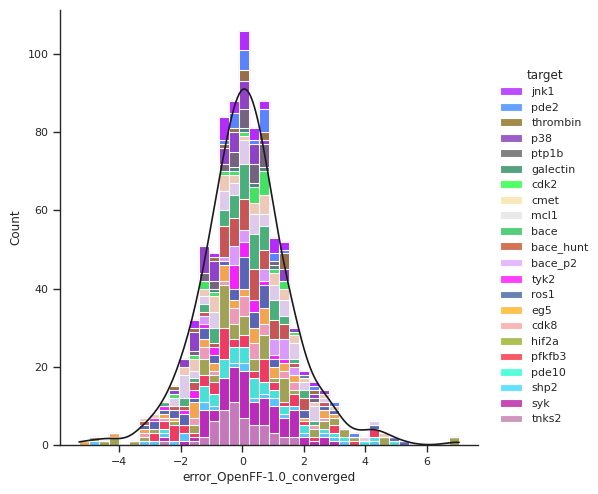

<Figure size 310x300 with 0 Axes>

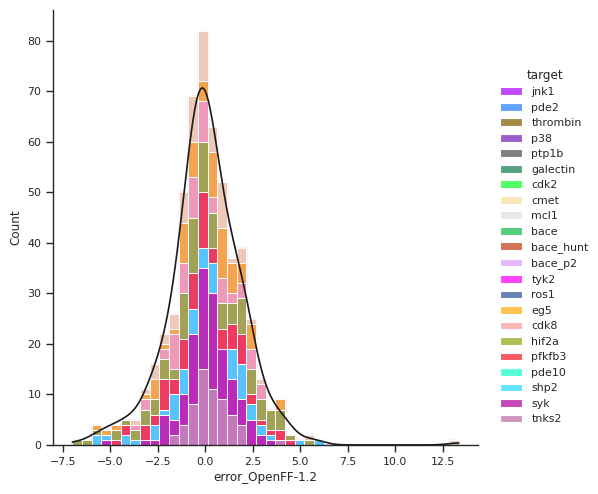

<Figure size 310x300 with 0 Axes>

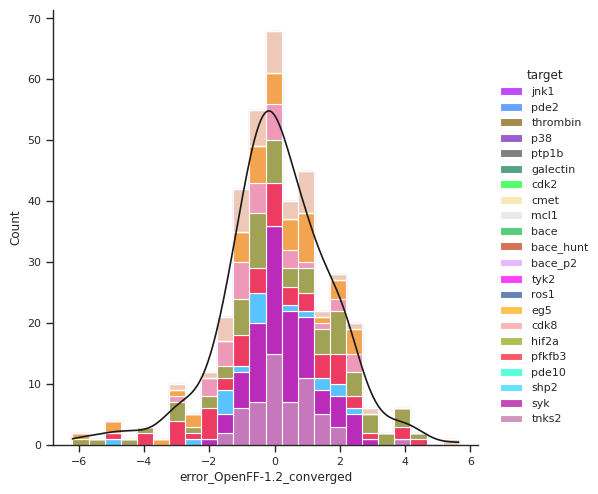

<Figure size 310x300 with 0 Axes>

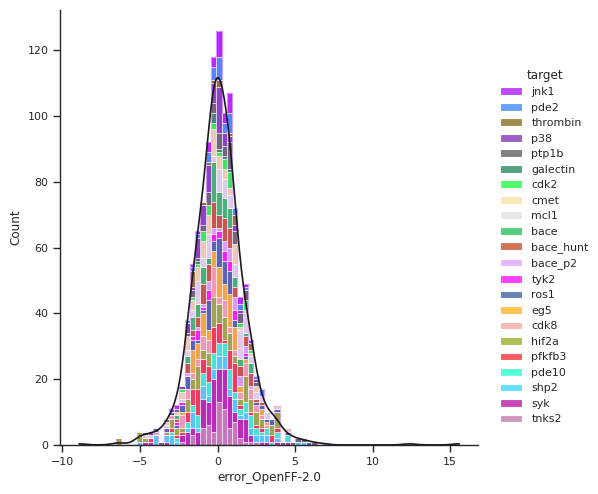

<Figure size 310x300 with 0 Axes>

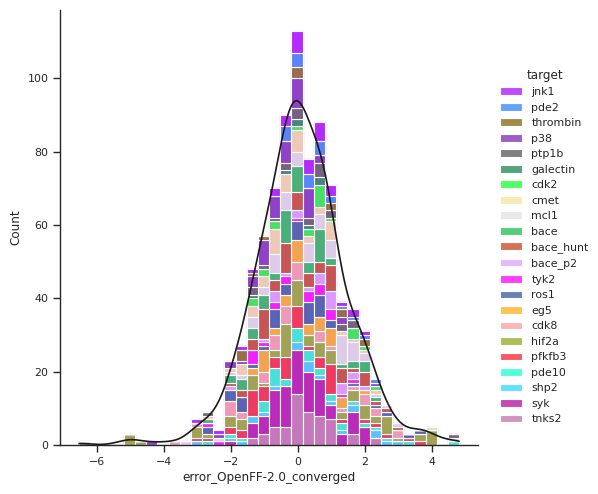

<Figure size 310x300 with 0 Axes>

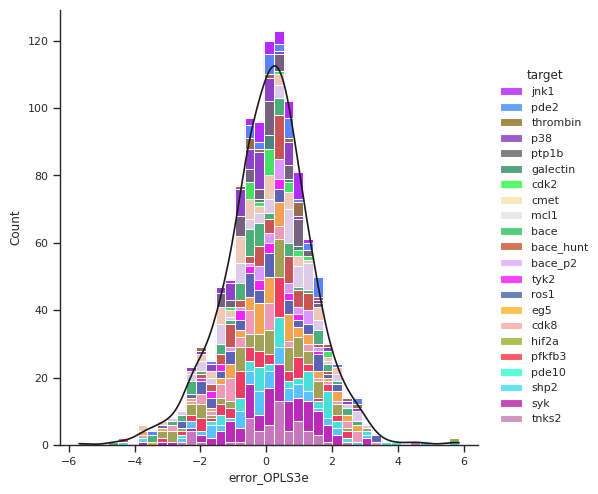

<Figure size 310x300 with 0 Axes>

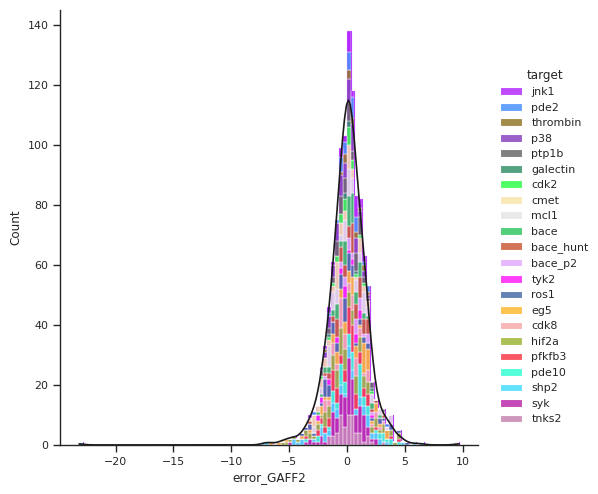

<Figure size 310x300 with 0 Axes>

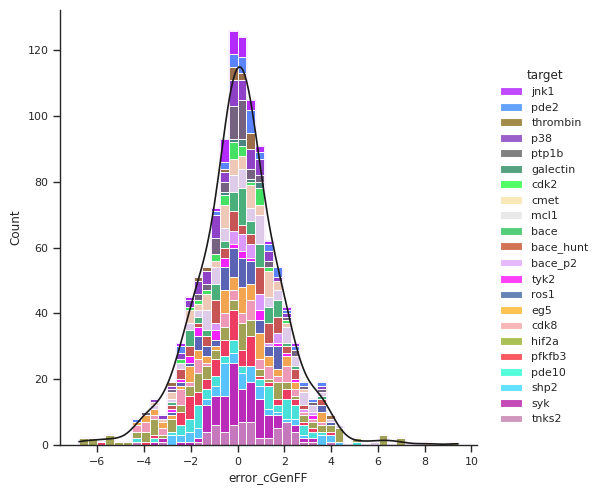

<Figure size 310x300 with 0 Axes>

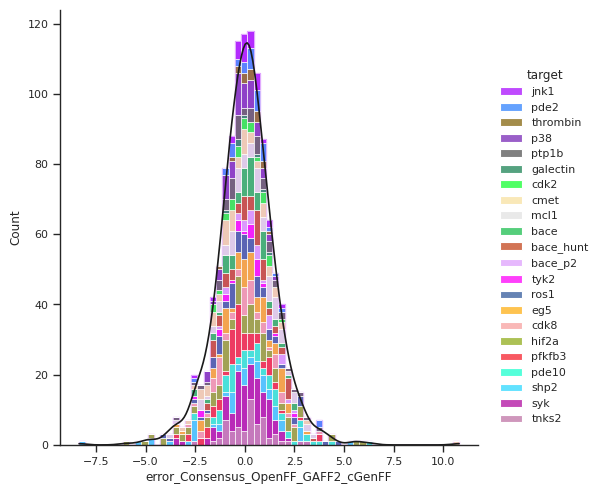

<Figure size 310x300 with 0 Axes>

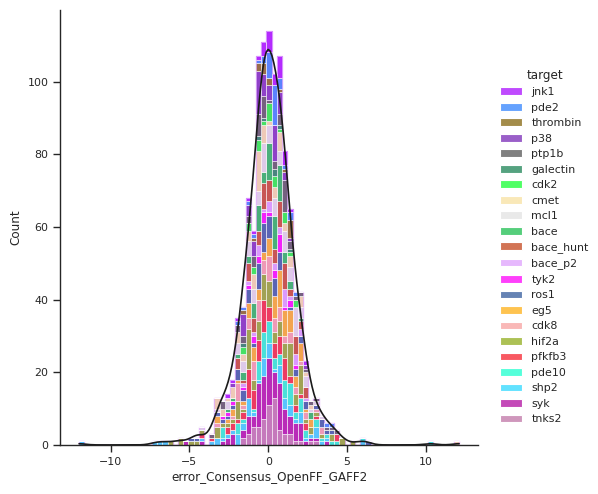

<Figure size 310x300 with 0 Axes>

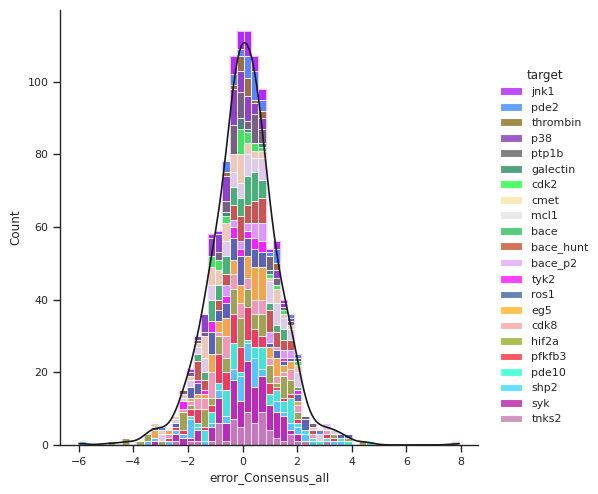

In [4]:
sns.set(style="ticks", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
for idx in identifiers[1:]:
    fig = plt.figure(figsize=(3.1,3))
    sns.set_palette(sns.color_palette(colors.qualitative.Alphabet))
    loc = np.mean(all_edges[f"error_{idx}"])
    scale = np.std(all_edges[f"error_{idx}"])
    sns.displot(data=all_edges, x=f"error_{idx}", hue="target", multiple='stack')
    ax = sns.histplot(data=all_edges, x=f"error_{idx}", kde=True, element='step', ax=plt.gca())
    ax.lines[0].set_color('k')


In [5]:
for i, row in all_edges.iterrows():
    if pd.isna(all_edges.loc[i, "error_OpenFF-2.0_converged"]):
        all_edges.loc[i, "error_OpenFF-2.0_nonconverged"] = all_edges.loc[i, "error_OpenFF-2.0"]

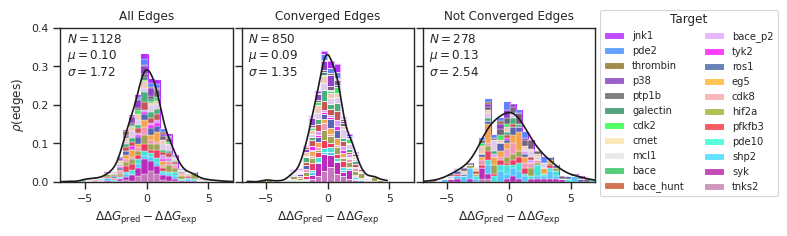

In [6]:
sns.set_palette(sns.color_palette(colors.qualitative.Alphabet))

fig, ax = plt.subplots(1, 3, figsize=(6.9, 2), sharey=True)
plt.subplots_adjust( wspace=0.05)
idx = "OpenFF-2.0"
loc = np.mean(all_edges[f"error_{idx}"])
scale = np.std(all_edges[f"error_{idx}"])
g = sns.histplot(data=all_edges, x=f"error_{idx}", hue="target", multiple='stack', stat="density", binwidth=.5, ax=ax[0], hue_order=['jnk1', 'pde2', 'thrombin', 'p38', 'ptp1b', 'galectin', 'cdk2',
       'cmet', 'mcl1', 'bace', 'bace_hunt', 'bace_p2', 'tyk2', 'ros1',
       'eg5', 'cdk8', 'hif2a', 'pfkfb3', 'pde10', 'shp2', 'syk', 'tnks2'])
sns.histplot(data=all_edges, x=f"error_{idx}", kde=True, element='step', stat="density", binwidth=.5, ax=ax[0])
ax[0].lines[0].set_color('k')
ax[0].text(-6.5,.24, f"$N=$"+f"{(~(all_edges[f'error_{idx}'].isna())).sum()}\n"+r"$\mu=$"+f"{loc:.2f}\n"+f"$\sigma=$"+f"{scale:.2f}\n")
ax[0].set_xlabel(r"$\Delta \Delta G_{\mathrm{pred}} - \Delta \Delta G_{\mathrm{exp}}$")
ax[0].set_ylim(0, .4)
ax[0].set_xlim(-7,7)
ax[0].set_title("All Edges")
ax[0].get_legend().remove()

idx = "OpenFF-2.0_converged"
loc = np.mean(all_edges[f"error_{idx}"])
scale = np.std(all_edges[f"error_{idx}"])
g= sns.histplot(data=all_edges[~all_edges[f"error_{idx}"].isna()], x=f"error_{idx}", hue="target", stat="density", multiple='stack', binwidth=.5, ax=ax[1], hue_order=['jnk1', 'pde2', 'thrombin', 'p38', 'ptp1b', 'galectin', 'cdk2',
       'cmet', 'mcl1', 'bace', 'bace_hunt', 'bace_p2', 'tyk2', 'ros1',
       'eg5', 'cdk8', 'hif2a', 'pfkfb3', 'pde10', 'shp2', 'syk', 'tnks2'])
sns.histplot(data=all_edges, x=f"error_{idx}", kde=True, element='step', stat="density", binwidth=.5, ax=ax[1])
ax[1].lines[0].set_color('k')
ax[1].text(-6.5, .24, f"$N=$"+f"{(~(all_edges[f'error_{idx}'].isna())).sum()}\n"+r"$\mu=$"+f"{loc:.2f}\n"+f"$\sigma=$"+f"{scale:.2f}\n")
ax[1].set_xlabel(r"$\Delta \Delta G_{\mathrm{pred}} - \Delta \Delta G_{\mathrm{exp}}$")
ax[1].set_xlim(-7,7)
# ax[1].set_yticks([])
ax[1].set_title("Converged Edges")
ax[1].get_legend().remove()



idx = "OpenFF-2.0_nonconverged"
loc = np.mean(all_edges[f"error_{idx}"])
scale = np.std(all_edges[f"error_{idx}"])
g= sns.histplot(data=all_edges[~all_edges[f"error_{idx}"].isna()], x=f"error_{idx}", hue="target", stat="density", multiple='stack', binwidth=.5, ax=ax[2], hue_order=['jnk1', 'pde2', 'thrombin', 'p38', 'ptp1b', 'galectin', 'cdk2',
       'cmet', 'mcl1', 'bace', 'bace_hunt', 'bace_p2', 'tyk2', 'ros1',
       'eg5', 'cdk8', 'hif2a', 'pfkfb3', 'pde10', 'shp2', 'syk', 'tnks2'])
sns.histplot(data=all_edges, x=f"error_{idx}", kde=True, element='step', stat="density", binwidth=.5, ax=ax[2])
ax[2].lines[0].set_color('k')
ax[2].text(-6.5, .24, f"$N=$"+f"{(~(all_edges[f'error_{idx}'].isna())).sum()}\n"+r"$\mu=$"+f"{loc:.2f}\n"+f"$\sigma=$"+f"{scale:.2f}\n")
ax[2].set_xlabel(r"$\Delta \Delta G_{\mathrm{pred}} - \Delta \Delta G_{\mathrm{exp}}$")
ax[2].set_xlim(-7,7)
# ax[2].set_yticks([])
ax[2].set_title("Not Converged Edges")


ax[0].set_ylabel(r"$\rho (\mathrm{edges})$")

old_legend = ax[2].legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
ax[2].legend(handles, labels, loc="upper left", title="Target", bbox_to_anchor=(1.0, 1.15), ncol=2, fontsize="small")
plt.savefig(f"03g_histogram_openff_2_vs_converged.png", bbox_inches="tight")